In [1]:
from time import sleep
import pandas as pd
import numpy as np
from sympy import *
import tqdm
import time

In [2]:
df_2008 = pd.read_excel('final_df 2008.xlsx').reset_index(drop = True)
df_2009 = pd.read_excel('final_df 2009.xlsx').reset_index(drop = True)
df_2010 = pd.read_excel('final_df 2010.xlsx').reset_index(drop = True)
df_2011 = pd.read_excel('final_df 2011.xlsx').reset_index(drop = True)
df_2012 = pd.read_excel('final_df 2012.xlsx').reset_index(drop = True)
df_2013 = pd.read_excel('final_df 2013.xlsx').reset_index(drop = True)
df_2014 = pd.read_excel('final_df 2014.xlsx').reset_index(drop = True)
df_2015 = pd.read_excel('final_df 2015.xlsx').reset_index(drop = True)
df_2016 = pd.read_excel('final_df 2016.xlsx').reset_index(drop = True)
df_2017 = pd.read_excel('final_df 2017.xlsx').reset_index(drop = True)

In [3]:
def for_stata_transformation(df):
    wrong_columns = []
    for i in df.columns:
        if str(int(df['M&A year'].unique()[0])) not in i:
            if i not in ['Total Transaction Value ($USDmm, Historical rate)', 'Year Founded [Buyers/Investors].1',\
                         'M&A year', 'tau', 'IT industry', 'Healthcare industry', 'Aerospace industry',\
                         'Telecommunications industry', 'Pharma industry', 'IT industry target',\
                         'Healthcare industry target', 'Aerospace industry target',\
                         'Telecommunications industry target', 'Pharma industry target', 'Other industry target']:
                try:
                    df[i].astype(float)
                    wrong_columns.append(i)
                except ValueError:
                    pass
                except TypeError:
                    pass
    for i in df.columns:
        if str(int(df['M&A year'].unique()[0])) in i:
            df.rename(index=str, columns={i: i.replace(' [FY ' + str(int(df['M&A year'].unique()[0])) + ']', '')}, inplace = True)
    df = df.drop(wrong_columns, axis = 1)
    return df

In [4]:
def index_first_step(df, year):
    for i in range(1, 13):
        df['Total Assets [FY ' + str(year) + '] ($USDmm, Historical rate) [Target/Issuer] Month №' + str(i)] = 0
    df['M&A month'] = df['All Transactions Announced Date'].dt.month
    #df.loc[pd.isnull(df['Total Assets [FY ' + str(year) + '] ($USDmm, Historical rate) [Target/Issuer]']),\
    #            'Total Assets [FY ' + str(year) + '] ($USDmm, Historical rate) [Target/Issuer]'] = \
    #df[pd.isnull(df['Total Assets [FY ' + str(year) + '] ($USDmm, Historical rate) [Target/Issuer]'])]['Total Transaction Value ($USDmm, Historical rate)']
    for i in range(1, 13):
        df.loc[df['M&A month'] == i, 'Total Assets [FY ' + str(year) + '] ($USDmm, Historical rate) [Target/Issuer] Month №' + str(i)]\
        = df[df['M&A month'] == i]['Total Assets [FY ' + str(year) + '] ($USDmm, Historical rate) [Target/Issuer]'].fillna(0)

In [5]:
index_first_step(df_2008, 2008)
index_first_step(df_2009, 2009)
index_first_step(df_2010, 2010)
index_first_step(df_2011, 2011)
index_first_step(df_2012, 2012)
index_first_step(df_2013, 2013)
index_first_step(df_2014, 2014)
index_first_step(df_2015, 2015)
index_first_step(df_2016, 2016)
index_first_step(df_2017, 2017)

In [6]:
def solve_dofiga(TAt1, TAt0, ta1, ta2, ta3, ta4, ta5, ta6, ta7, ta8, ta9, ta10, ta11, ta12):
    real_answer = 0
    x = Symbol('x', real = True)
    if TAt1 == 0 or TAt0 == 0:
        real_answer = float(nan)
    else:
        try:
            solution = nsolve(TAt0*x**12 + ta1*x**12 + ta2*x**11 + ta3*x**10 + ta4*x**9 + ta5*x**8 + ta6*x**7 + ta7*x**6 + ta8*x**5 + ta9*x**4 + ta10*x**3 + ta11*x**2 + ta12*x - TAt1, 1)
            real_answer = solution**12-1
        except ValueError:
            real_answer = float(nan)
    return real_answer

In [7]:
for_index_2008_target = df_2008.groupby('Security Tickers [Buyers/Investors] without date').sum()
for_index_2008_buyer = df_2008.groupby('Security Tickers [Buyers/Investors] without date').mean()
index_2008 = []
a = 0
print(len(for_index_2008_target), len(for_index_2008_buyer))
for i in range(len(for_index_2008_target)):
    TAt1 = float(for_index_2008_buyer['Total Assets [FY 2009] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i])
    TAt0 = float(for_index_2008_buyer['Total Assets [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i])
    ta1 = float(for_index_2008_target['Total Assets [FY 2008] ($USDmm, Historical rate) [Target/Issuer] Month №1'].fillna(0)[i])
    ta2 = float(for_index_2008_target['Total Assets [FY 2008] ($USDmm, Historical rate) [Target/Issuer] Month №2'].fillna(0)[i])
    ta3 = float(for_index_2008_target['Total Assets [FY 2008] ($USDmm, Historical rate) [Target/Issuer] Month №3'].fillna(0)[i])
    ta4 = float(for_index_2008_target['Total Assets [FY 2008] ($USDmm, Historical rate) [Target/Issuer] Month №4'].fillna(0)[i])
    ta5 = float(for_index_2008_target['Total Assets [FY 2008] ($USDmm, Historical rate) [Target/Issuer] Month №5'].fillna(0)[i])
    ta6 = float(for_index_2008_target['Total Assets [FY 2008] ($USDmm, Historical rate) [Target/Issuer] Month №6'].fillna(0)[i])
    ta7 = float(for_index_2008_target['Total Assets [FY 2008] ($USDmm, Historical rate) [Target/Issuer] Month №7'].fillna(0)[i])
    ta8 = float(for_index_2008_target['Total Assets [FY 2008] ($USDmm, Historical rate) [Target/Issuer] Month №8'].fillna(0)[i])
    ta9 = float(for_index_2008_target['Total Assets [FY 2008] ($USDmm, Historical rate) [Target/Issuer] Month №9'].fillna(0)[i])
    ta10 = float(for_index_2008_target['Total Assets [FY 2008] ($USDmm, Historical rate) [Target/Issuer] Month №10'].fillna(0)[i])
    ta11 = float(for_index_2008_target['Total Assets [FY 2008] ($USDmm, Historical rate) [Target/Issuer] Month №11'].fillna(0)[i])
    ta12 = float(for_index_2008_target['Total Assets [FY 2008] ($USDmm, Historical rate) [Target/Issuer] Month №12'].fillna(0)[i])
    index_2008.append(solve_dofiga(TAt1, TAt0, ta1, ta2, ta3, ta4, ta5, ta6, ta7, ta8, ta9, ta10, ta11, ta12))

378 378


In [8]:
len(index_2008)

378

In [9]:
for_index_2008_buyer['Internal growth [FY 2008]'] = index_2008

In [10]:
print(TAt1, TAt0, ta1, ta2, ta3, ta4, ta5, ta6, ta7, ta8, ta9, ta10, ta11, ta12)

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


In [11]:
index_2009 = []
a = 0
for_index_2009_target = df_2009.groupby('Security Tickers [Buyers/Investors] without date').sum()
for_index_2009_buyer = df_2009.groupby('Security Tickers [Buyers/Investors] without date').mean()
print(len(for_index_2009_target), len(for_index_2009_buyer))
for i in range(len(for_index_2009_target)):
    TAt1 = for_index_2009_buyer['Total Assets [FY 2010] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    TAt0 = for_index_2009_buyer['Total Assets [FY 2009] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    ta1 = for_index_2009_target['Total Assets [FY 2009] ($USDmm, Historical rate) [Target/Issuer] Month №1'].fillna(0)[i]
    ta2 = for_index_2009_target['Total Assets [FY 2009] ($USDmm, Historical rate) [Target/Issuer] Month №2'].fillna(0)[i]
    ta3 = for_index_2009_target['Total Assets [FY 2009] ($USDmm, Historical rate) [Target/Issuer] Month №3'].fillna(0)[i]
    ta4 = for_index_2009_target['Total Assets [FY 2009] ($USDmm, Historical rate) [Target/Issuer] Month №4'].fillna(0)[i]
    ta5 = for_index_2009_target['Total Assets [FY 2009] ($USDmm, Historical rate) [Target/Issuer] Month №5'].fillna(0)[i]
    ta6 = for_index_2009_target['Total Assets [FY 2009] ($USDmm, Historical rate) [Target/Issuer] Month №6'].fillna(0)[i]
    ta7 = for_index_2009_target['Total Assets [FY 2009] ($USDmm, Historical rate) [Target/Issuer] Month №7'].fillna(0)[i]
    ta8 = for_index_2009_target['Total Assets [FY 2009] ($USDmm, Historical rate) [Target/Issuer] Month №8'].fillna(0)[i]
    ta9 = for_index_2009_target['Total Assets [FY 2009] ($USDmm, Historical rate) [Target/Issuer] Month №9'].fillna(0)[i]
    ta10 = for_index_2009_target['Total Assets [FY 2009] ($USDmm, Historical rate) [Target/Issuer] Month №10'].fillna(0)[i]
    ta11 = for_index_2009_target['Total Assets [FY 2009] ($USDmm, Historical rate) [Target/Issuer] Month №11'].fillna(0)[i]
    ta12 = for_index_2009_target['Total Assets [FY 2009] ($USDmm, Historical rate) [Target/Issuer] Month №12'].fillna(0)[i]
    index_2009.append(solve_dofiga(TAt1, TAt0, ta1, ta2, ta3, ta4, ta5, ta6, ta7, ta8, ta9, ta10, ta11, ta12))

331 331


In [12]:
for_index_2009_buyer['Internal growth [FY 2009]'] = index_2009

In [13]:
index_2010 = []
a = 0
for_index_2010_target = df_2010.groupby('Security Tickers [Buyers/Investors] without date').sum()
for_index_2010_buyer = df_2010.groupby('Security Tickers [Buyers/Investors] without date').mean()
print(len(for_index_2010_target), len(for_index_2010_buyer))
for i in range(len(for_index_2010_target)):
    TAt1 = for_index_2010_buyer['Total Assets [FY 2011] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    TAt0 = for_index_2010_buyer['Total Assets [FY 2010] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    ta1 = for_index_2010_target['Total Assets [FY 2010] ($USDmm, Historical rate) [Target/Issuer] Month №1'].fillna(0)[i]
    ta2 = for_index_2010_target['Total Assets [FY 2010] ($USDmm, Historical rate) [Target/Issuer] Month №2'].fillna(0)[i]
    ta3 = for_index_2010_target['Total Assets [FY 2010] ($USDmm, Historical rate) [Target/Issuer] Month №3'].fillna(0)[i]
    ta4 = for_index_2010_target['Total Assets [FY 2010] ($USDmm, Historical rate) [Target/Issuer] Month №4'].fillna(0)[i]
    ta5 = for_index_2010_target['Total Assets [FY 2010] ($USDmm, Historical rate) [Target/Issuer] Month №5'].fillna(0)[i]
    ta6 = for_index_2010_target['Total Assets [FY 2010] ($USDmm, Historical rate) [Target/Issuer] Month №6'].fillna(0)[i]
    ta7 = for_index_2010_target['Total Assets [FY 2010] ($USDmm, Historical rate) [Target/Issuer] Month №7'].fillna(0)[i]
    ta8 = for_index_2010_target['Total Assets [FY 2010] ($USDmm, Historical rate) [Target/Issuer] Month №8'].fillna(0)[i]
    ta9 = for_index_2010_target['Total Assets [FY 2010] ($USDmm, Historical rate) [Target/Issuer] Month №9'].fillna(0)[i]
    ta10 = for_index_2010_target['Total Assets [FY 2010] ($USDmm, Historical rate) [Target/Issuer] Month №10'].fillna(0)[i]
    ta11 = for_index_2010_target['Total Assets [FY 2010] ($USDmm, Historical rate) [Target/Issuer] Month №11'].fillna(0)[i]
    ta12 = for_index_2010_target['Total Assets [FY 2010] ($USDmm, Historical rate) [Target/Issuer] Month №12'].fillna(0)[i]
    index_2010.append(solve_dofiga(TAt1, TAt0, ta1, ta2, ta3, ta4, ta5, ta6, ta7, ta8, ta9, ta10, ta11, ta12))

404 404


In [14]:
for_index_2010_buyer['Internal growth [FY 2010]'] = index_2010

In [15]:
index_2011 = []
a = 0
for_index_2011_target = df_2011.groupby('Security Tickers [Buyers/Investors] without date').sum()
for_index_2011_buyer = df_2011.groupby('Security Tickers [Buyers/Investors] without date').mean()
print(len(for_index_2011_target), len(for_index_2011_buyer))
for i in range(len(for_index_2011_target)):
    TAt1 = for_index_2011_buyer['Total Assets [FY 2012] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    TAt0 = for_index_2011_buyer['Total Assets [FY 2011] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    ta1 = for_index_2011_target['Total Assets [FY 2011] ($USDmm, Historical rate) [Target/Issuer] Month №1'].fillna(0)[i]
    ta2 = for_index_2011_target['Total Assets [FY 2011] ($USDmm, Historical rate) [Target/Issuer] Month №2'].fillna(0)[i]
    ta3 = for_index_2011_target['Total Assets [FY 2011] ($USDmm, Historical rate) [Target/Issuer] Month №3'].fillna(0)[i]
    ta4 = for_index_2011_target['Total Assets [FY 2011] ($USDmm, Historical rate) [Target/Issuer] Month №4'].fillna(0)[i]
    ta5 = for_index_2011_target['Total Assets [FY 2011] ($USDmm, Historical rate) [Target/Issuer] Month №5'].fillna(0)[i]
    ta6 = for_index_2011_target['Total Assets [FY 2011] ($USDmm, Historical rate) [Target/Issuer] Month №6'].fillna(0)[i]
    ta7 = for_index_2011_target['Total Assets [FY 2011] ($USDmm, Historical rate) [Target/Issuer] Month №7'].fillna(0)[i]
    ta8 = for_index_2011_target['Total Assets [FY 2011] ($USDmm, Historical rate) [Target/Issuer] Month №8'].fillna(0)[i]
    ta9 = for_index_2011_target['Total Assets [FY 2011] ($USDmm, Historical rate) [Target/Issuer] Month №9'].fillna(0)[i]
    ta10 = for_index_2011_target['Total Assets [FY 2011] ($USDmm, Historical rate) [Target/Issuer] Month №10'].fillna(0)[i]
    ta11 = for_index_2011_target['Total Assets [FY 2011] ($USDmm, Historical rate) [Target/Issuer] Month №11'].fillna(0)[i]
    ta12 = for_index_2011_target['Total Assets [FY 2011] ($USDmm, Historical rate) [Target/Issuer] Month №12'].fillna(0)[i]
    index_2011.append(solve_dofiga(TAt1, TAt0, ta1, ta2, ta3, ta4, ta5, ta6, ta7, ta8, ta9, ta10, ta11, ta12))

420 420


In [16]:
for_index_2011_buyer['Internal growth [FY 2011]'] = index_2011

In [17]:
index_2012 = []
a = 0
for_index_2012_target = df_2012.groupby('Security Tickers [Buyers/Investors] without date').sum()
for_index_2012_buyer = df_2012.groupby('Security Tickers [Buyers/Investors] without date').mean()
print(len(for_index_2012_target), len(for_index_2012_buyer))
for i in range(len(for_index_2012_target)):
    TAt1 = for_index_2012_buyer['Total Assets [FY 2013] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    TAt0 = for_index_2012_buyer['Total Assets [FY 2012] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    ta1 = for_index_2012_target['Total Assets [FY 2012] ($USDmm, Historical rate) [Target/Issuer] Month №1'].fillna(0)[i]
    ta2 = for_index_2012_target['Total Assets [FY 2012] ($USDmm, Historical rate) [Target/Issuer] Month №2'].fillna(0)[i]
    ta3 = for_index_2012_target['Total Assets [FY 2012] ($USDmm, Historical rate) [Target/Issuer] Month №3'].fillna(0)[i]
    ta4 = for_index_2012_target['Total Assets [FY 2012] ($USDmm, Historical rate) [Target/Issuer] Month №4'].fillna(0)[i]
    ta5 = for_index_2012_target['Total Assets [FY 2012] ($USDmm, Historical rate) [Target/Issuer] Month №5'].fillna(0)[i]
    ta6 = for_index_2012_target['Total Assets [FY 2012] ($USDmm, Historical rate) [Target/Issuer] Month №6'].fillna(0)[i]
    ta7 = for_index_2012_target['Total Assets [FY 2012] ($USDmm, Historical rate) [Target/Issuer] Month №7'].fillna(0)[i]
    ta8 = for_index_2012_target['Total Assets [FY 2012] ($USDmm, Historical rate) [Target/Issuer] Month №8'].fillna(0)[i]
    ta9 = for_index_2012_target['Total Assets [FY 2012] ($USDmm, Historical rate) [Target/Issuer] Month №9'].fillna(0)[i]
    ta10 = for_index_2012_target['Total Assets [FY 2012] ($USDmm, Historical rate) [Target/Issuer] Month №10'].fillna(0)[i]
    ta11 = for_index_2012_target['Total Assets [FY 2012] ($USDmm, Historical rate) [Target/Issuer] Month №11'].fillna(0)[i]
    ta12 = for_index_2012_target['Total Assets [FY 2012] ($USDmm, Historical rate) [Target/Issuer] Month №12'].fillna(0)[i]
    index_2012.append(solve_dofiga(TAt1, TAt0, ta1, ta2, ta3, ta4, ta5, ta6, ta7, ta8, ta9, ta10, ta11, ta12))

415 415


In [18]:
for_index_2012_buyer['Internal growth [FY 2012]'] = index_2012

In [19]:
index_2013 = []
a = 0
for_index_2013_target = df_2013.groupby('Security Tickers [Buyers/Investors] without date').sum()
for_index_2013_buyer = df_2013.groupby('Security Tickers [Buyers/Investors] without date').mean()
print(len(for_index_2013_target), len(for_index_2013_buyer))
for i in range(len(for_index_2013_target)):
    TAt1 = for_index_2013_buyer['Total Assets [FY 2014] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    TAt0 = for_index_2013_buyer['Total Assets [FY 2013] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    ta1 = for_index_2013_target['Total Assets [FY 2013] ($USDmm, Historical rate) [Target/Issuer] Month №1'].fillna(0)[i]
    ta2 = for_index_2013_target['Total Assets [FY 2013] ($USDmm, Historical rate) [Target/Issuer] Month №2'].fillna(0)[i]
    ta3 = for_index_2013_target['Total Assets [FY 2013] ($USDmm, Historical rate) [Target/Issuer] Month №3'].fillna(0)[i]
    ta4 = for_index_2013_target['Total Assets [FY 2013] ($USDmm, Historical rate) [Target/Issuer] Month №4'].fillna(0)[i]
    ta5 = for_index_2013_target['Total Assets [FY 2013] ($USDmm, Historical rate) [Target/Issuer] Month №5'].fillna(0)[i]
    ta6 = for_index_2013_target['Total Assets [FY 2013] ($USDmm, Historical rate) [Target/Issuer] Month №6'].fillna(0)[i]
    ta7 = for_index_2013_target['Total Assets [FY 2013] ($USDmm, Historical rate) [Target/Issuer] Month №7'].fillna(0)[i]
    ta8 = for_index_2013_target['Total Assets [FY 2013] ($USDmm, Historical rate) [Target/Issuer] Month №8'].fillna(0)[i]
    ta9 = for_index_2013_target['Total Assets [FY 2013] ($USDmm, Historical rate) [Target/Issuer] Month №9'].fillna(0)[i]
    ta10 = for_index_2013_target['Total Assets [FY 2013] ($USDmm, Historical rate) [Target/Issuer] Month №10'].fillna(0)[i]
    ta11 = for_index_2013_target['Total Assets [FY 2013] ($USDmm, Historical rate) [Target/Issuer] Month №11'].fillna(0)[i]
    ta12 = for_index_2013_target['Total Assets [FY 2013] ($USDmm, Historical rate) [Target/Issuer] Month №12'].fillna(0)[i]
    index_2013.append(solve_dofiga(TAt1, TAt0, ta1, ta2, ta3, ta4, ta5, ta6, ta7, ta8, ta9, ta10, ta11, ta12))

389 389


In [20]:
for_index_2013_buyer['Internal growth [FY 2013]'] = index_2013

In [21]:
index_2014 = []
a = 0
for_index_2014_target = df_2014.groupby('Security Tickers [Buyers/Investors] without date').sum()
for_index_2014_buyer = df_2014.groupby('Security Tickers [Buyers/Investors] without date').mean()
print(len(for_index_2014_target), len(for_index_2014_buyer))
for i in range(len(for_index_2014_target)):
    TAt1 = for_index_2014_buyer['Total Assets [FY 2015] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    TAt0 = for_index_2014_buyer['Total Assets [FY 2014] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    ta1 = for_index_2014_target['Total Assets [FY 2014] ($USDmm, Historical rate) [Target/Issuer] Month №1'].fillna(0)[i]
    ta2 = for_index_2014_target['Total Assets [FY 2014] ($USDmm, Historical rate) [Target/Issuer] Month №2'].fillna(0)[i]
    ta3 = for_index_2014_target['Total Assets [FY 2014] ($USDmm, Historical rate) [Target/Issuer] Month №3'].fillna(0)[i]
    ta4 = for_index_2014_target['Total Assets [FY 2014] ($USDmm, Historical rate) [Target/Issuer] Month №4'].fillna(0)[i]
    ta5 = for_index_2014_target['Total Assets [FY 2014] ($USDmm, Historical rate) [Target/Issuer] Month №5'].fillna(0)[i]
    ta6 = for_index_2014_target['Total Assets [FY 2014] ($USDmm, Historical rate) [Target/Issuer] Month №6'].fillna(0)[i]
    ta7 = for_index_2014_target['Total Assets [FY 2014] ($USDmm, Historical rate) [Target/Issuer] Month №7'].fillna(0)[i]
    ta8 = for_index_2014_target['Total Assets [FY 2014] ($USDmm, Historical rate) [Target/Issuer] Month №8'].fillna(0)[i]
    ta9 = for_index_2014_target['Total Assets [FY 2014] ($USDmm, Historical rate) [Target/Issuer] Month №9'].fillna(0)[i]
    ta10 = for_index_2014_target['Total Assets [FY 2014] ($USDmm, Historical rate) [Target/Issuer] Month №10'].fillna(0)[i]
    ta11 = for_index_2014_target['Total Assets [FY 2014] ($USDmm, Historical rate) [Target/Issuer] Month №11'].fillna(0)[i]
    ta12 = for_index_2014_target['Total Assets [FY 2014] ($USDmm, Historical rate) [Target/Issuer] Month №12'].fillna(0)[i]
    index_2014.append(solve_dofiga(TAt1, TAt0, ta1, ta2, ta3, ta4, ta5, ta6, ta7, ta8, ta9, ta10, ta11, ta12))

500 500


In [22]:
for_index_2014_buyer['Internal growth [FY 2014]'] = index_2014

In [23]:
index_2015 = []
a = 0
for_index_2015_target = df_2015.groupby('Security Tickers [Buyers/Investors] without date').sum()
for_index_2015_buyer = df_2015.groupby('Security Tickers [Buyers/Investors] without date').mean()
print(len(for_index_2015_target), len(for_index_2015_buyer))
for i in range(len(for_index_2015_target)):
    TAt1 = for_index_2015_buyer['Total Assets [FY 2016] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    TAt0 = for_index_2015_buyer['Total Assets [FY 2015] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    ta1 = for_index_2015_target['Total Assets [FY 2015] ($USDmm, Historical rate) [Target/Issuer] Month №1'].fillna(0)[i]
    ta2 = for_index_2015_target['Total Assets [FY 2015] ($USDmm, Historical rate) [Target/Issuer] Month №2'].fillna(0)[i]
    ta3 = for_index_2015_target['Total Assets [FY 2015] ($USDmm, Historical rate) [Target/Issuer] Month №3'].fillna(0)[i]
    ta4 = for_index_2015_target['Total Assets [FY 2015] ($USDmm, Historical rate) [Target/Issuer] Month №4'].fillna(0)[i]
    ta5 = for_index_2015_target['Total Assets [FY 2015] ($USDmm, Historical rate) [Target/Issuer] Month №5'].fillna(0)[i]
    ta6 = for_index_2015_target['Total Assets [FY 2015] ($USDmm, Historical rate) [Target/Issuer] Month №6'].fillna(0)[i]
    ta7 = for_index_2015_target['Total Assets [FY 2015] ($USDmm, Historical rate) [Target/Issuer] Month №7'].fillna(0)[i]
    ta8 = for_index_2015_target['Total Assets [FY 2015] ($USDmm, Historical rate) [Target/Issuer] Month №8'].fillna(0)[i]
    ta9 = for_index_2015_target['Total Assets [FY 2015] ($USDmm, Historical rate) [Target/Issuer] Month №9'].fillna(0)[i]
    ta10 = for_index_2015_target['Total Assets [FY 2015] ($USDmm, Historical rate) [Target/Issuer] Month №10'].fillna(0)[i]
    ta11 = for_index_2015_target['Total Assets [FY 2015] ($USDmm, Historical rate) [Target/Issuer] Month №11'].fillna(0)[i]
    ta12 = for_index_2015_target['Total Assets [FY 2015] ($USDmm, Historical rate) [Target/Issuer] Month №12'].fillna(0)[i]
    index_2015.append(solve_dofiga(TAt1, TAt0, ta1, ta2, ta3, ta4, ta5, ta6, ta7, ta8, ta9, ta10, ta11, ta12))

493 493


In [24]:
for_index_2015_buyer['Internal growth [FY 2015]'] = index_2015

In [25]:
index_2016 = []
a = 0
for_index_2016_target = df_2016.groupby('Security Tickers [Buyers/Investors] without date').sum()
for_index_2016_buyer = df_2016.groupby('Security Tickers [Buyers/Investors] without date').mean()
print(len(for_index_2016_target), len(for_index_2016_buyer))
for i in range(len(for_index_2016_target)):
    TAt1 = for_index_2016_buyer['Total Assets [FY 2017] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    TAt0 = for_index_2016_buyer['Total Assets [FY 2016] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    ta1 = for_index_2016_target['Total Assets [FY 2016] ($USDmm, Historical rate) [Target/Issuer] Month №1'].fillna(0)[i]
    ta2 = for_index_2016_target['Total Assets [FY 2016] ($USDmm, Historical rate) [Target/Issuer] Month №2'].fillna(0)[i]
    ta3 = for_index_2016_target['Total Assets [FY 2016] ($USDmm, Historical rate) [Target/Issuer] Month №3'].fillna(0)[i]
    ta4 = for_index_2016_target['Total Assets [FY 2016] ($USDmm, Historical rate) [Target/Issuer] Month №4'].fillna(0)[i]
    ta5 = for_index_2016_target['Total Assets [FY 2016] ($USDmm, Historical rate) [Target/Issuer] Month №5'].fillna(0)[i]
    ta6 = for_index_2016_target['Total Assets [FY 2016] ($USDmm, Historical rate) [Target/Issuer] Month №6'].fillna(0)[i]
    ta7 = for_index_2016_target['Total Assets [FY 2016] ($USDmm, Historical rate) [Target/Issuer] Month №7'].fillna(0)[i]
    ta8 = for_index_2016_target['Total Assets [FY 2016] ($USDmm, Historical rate) [Target/Issuer] Month №8'].fillna(0)[i]
    ta9 = for_index_2016_target['Total Assets [FY 2016] ($USDmm, Historical rate) [Target/Issuer] Month №9'].fillna(0)[i]
    ta10 = for_index_2016_target['Total Assets [FY 2016] ($USDmm, Historical rate) [Target/Issuer] Month №10'].fillna(0)[i]
    ta11 = for_index_2016_target['Total Assets [FY 2016] ($USDmm, Historical rate) [Target/Issuer] Month №11'].fillna(0)[i]
    ta12 = for_index_2016_target['Total Assets [FY 2016] ($USDmm, Historical rate) [Target/Issuer] Month №12'].fillna(0)[i]
    index_2016.append(solve_dofiga(TAt1, TAt0, ta1, ta2, ta3, ta4, ta5, ta6, ta7, ta8, ta9, ta10, ta11, ta12))

426 426


In [26]:
for_index_2016_buyer['Internal growth [FY 2016]'] = index_2016

In [27]:
index_2017 = []
a = 0
for_index_2017_target = df_2017.groupby('Security Tickers [Buyers/Investors] without date').sum()
for_index_2017_buyer = df_2017.groupby('Security Tickers [Buyers/Investors] without date').mean()
print(len(for_index_2017_target), len(for_index_2017_buyer))
for i in range(len(for_index_2017_target)):
    TAt1 = for_index_2017_buyer['Total Assets [FY 2018] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    TAt0 = for_index_2017_buyer['Total Assets [FY 2017] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)[i]
    ta1 = for_index_2017_target['Total Assets [FY 2017] ($USDmm, Historical rate) [Target/Issuer] Month №1'].fillna(0)[i]
    ta2 = for_index_2017_target['Total Assets [FY 2017] ($USDmm, Historical rate) [Target/Issuer] Month №2'].fillna(0)[i]
    ta3 = for_index_2017_target['Total Assets [FY 2017] ($USDmm, Historical rate) [Target/Issuer] Month №3'].fillna(0)[i]
    ta4 = for_index_2017_target['Total Assets [FY 2017] ($USDmm, Historical rate) [Target/Issuer] Month №4'].fillna(0)[i]
    ta5 = for_index_2017_target['Total Assets [FY 2017] ($USDmm, Historical rate) [Target/Issuer] Month №5'].fillna(0)[i]
    ta6 = for_index_2017_target['Total Assets [FY 2017] ($USDmm, Historical rate) [Target/Issuer] Month №6'].fillna(0)[i]
    ta7 = for_index_2017_target['Total Assets [FY 2017] ($USDmm, Historical rate) [Target/Issuer] Month №7'].fillna(0)[i]
    ta8 = for_index_2017_target['Total Assets [FY 2017] ($USDmm, Historical rate) [Target/Issuer] Month №8'].fillna(0)[i]
    ta9 = for_index_2017_target['Total Assets [FY 2017] ($USDmm, Historical rate) [Target/Issuer] Month №9'].fillna(0)[i]
    ta10 = for_index_2017_target['Total Assets [FY 2017] ($USDmm, Historical rate) [Target/Issuer] Month №10'].fillna(0)[i]
    ta11 = for_index_2017_target['Total Assets [FY 2017] ($USDmm, Historical rate) [Target/Issuer] Month №11'].fillna(0)[i]
    ta12 = for_index_2017_target['Total Assets [FY 2017] ($USDmm, Historical rate) [Target/Issuer] Month №12'].fillna(0)[i]
    index_2017.append(solve_dofiga(TAt1, TAt0, ta1, ta2, ta3, ta4, ta5, ta6, ta7, ta8, ta9, ta10, ta11, ta12))

384 384


In [28]:
for_index_2017_buyer['Internal growth [FY 2017]'] = index_2017

In [29]:
meancalc = (df_2015['Total Transaction Value ($USDmm, Historical rate)']/df_2015['Total Assets [FY 2015] ($USDmm, Historical rate) [Buyers/Investors]']).dropna()

In [30]:
meancalc = meancalc[meancalc != np.float64('inf')]

(array([444.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.43339818e-05, 3.18000136e+01, 6.36000129e+01, 9.54000122e+01,
        1.27200011e+02, 1.59000011e+02, 1.90800010e+02, 2.22600009e+02,
        2.54400009e+02, 2.86200008e+02, 3.18000007e+02, 3.49800006e+02,
        3.81600006e+02, 4.13400005e+02, 4.45200004e+02, 4.77000004e+02,
        5.08800003e+02, 5.40600002e+02, 5.72400001e+02, 6.04200001e+02,
        6.36000000e+02]),
 <a list of 20 Patch objects>)

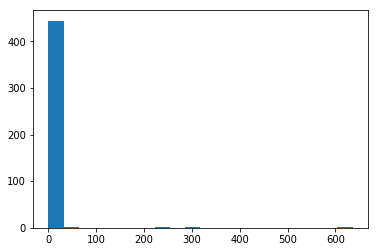

In [31]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.hist(meancalc, bins = 20)

In [32]:
for_index_2008_buyer = for_stata_transformation(for_index_2008_buyer)
for_index_2009_buyer = for_stata_transformation(for_index_2009_buyer)
for_index_2010_buyer = for_stata_transformation(for_index_2010_buyer)
for_index_2011_buyer = for_stata_transformation(for_index_2011_buyer)
for_index_2012_buyer = for_stata_transformation(for_index_2012_buyer)
for_index_2013_buyer = for_stata_transformation(for_index_2013_buyer)
for_index_2014_buyer = for_stata_transformation(for_index_2014_buyer)
for_index_2015_buyer = for_stata_transformation(for_index_2015_buyer)
for_index_2016_buyer = for_stata_transformation(for_index_2016_buyer)
for_index_2017_buyer = for_stata_transformation(for_index_2017_buyer)

In [33]:
list_years = [for_index_2008_buyer, for_index_2009_buyer, for_index_2010_buyer, for_index_2011_buyer, for_index_2012_buyer, for_index_2013_buyer, for_index_2014_buyer, for_index_2015_buyer, for_index_2016_buyer, for_index_2017_buyer]

In [34]:
forgive_me_df = pd.concat(list_years)

In [35]:
a = 0
for i in list_years:
    a += len(i)
a

4140

In [36]:
len(forgive_me_df)

4140

In [37]:
forgive_me_df.columns

Index(['Total Transaction Value ($USDmm, Historical rate)',
       'EBITDA ($USDmm, Historical rate) [Buyers/Investors]',
       'EBIT ($USDmm, Historical rate) [Buyers/Investors]',
       'Net Income Margin % [Buyers/Investors]',
       'Total Common Equity ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Debt ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Cash & ST Investments ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Assets ($USDmm, Historical rate) [Buyers/Investors]',
       'Net Debt ($USDmm, Historical rate) [Buyers/Investors]',
       'Return on Assets % [Buyers/Investors]',
       'Return on Equity % [Buyers/Investors]',
       'Cash from Ops. ($USDmm, Historical rate) [Buyers/Investors]',
       'Levered Free Cash Flow ($USDmm, Historical rate) [Buyers/Investors]',
       'Unlevered Free Cash Flow ($USDmm, Historical rate) [Buyers/Investors]',
       'R&D Exp. ($USDmm, Historical rate) [Buyers/Investors]',
       'Restructuring Cha

## Controls

Firm Age

In [38]:
forgive_me_df['Firm Age'] = forgive_me_df['M&A year'] - forgive_me_df['Year Founded [Buyers/Investors].1']

R&D intensity

In [39]:
rd = list(forgive_me_df['R&D Exp. ($USDmm, Historical rate) [Buyers/Investors]'])
forgive_me_df['R&D intensity'] = rd/forgive_me_df['Total Revenue ($USDmm, Historical rate) [Buyers/Investors]']
forgive_me_df['R&D intensity'] = forgive_me_df['R&D intensity'].replace(np.inf, np.float('nan'))

# Kras Index

In [40]:
Internal = forgive_me_df['Internal growth'].fillna(0)
Overall = forgive_me_df['Overall growth'].fillna(0)
forgive_me_df['Kras Index'] = Internal.where(Overall != 0, np.nan)
forgive_me_df.loc[forgive_me_df['Kras Index'].astype(str) == "nan", 'Kras Index'] = np.float(nan)
forgive_me_df['Kras Index'] = forgive_me_df['Kras Index'].replace(0, np.float('nan'))

# EVA

In [41]:
forgive_me_df['Economic Profit'] = forgive_me_df['Return on Equity % [Buyers/Investors]'] - forgive_me_df['COST OF CAPITAL']

## S&P core earnings index

includes:

In [42]:
RRCH = forgive_me_df['Restructuring Charges ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
AssWD = forgive_me_df['Asset Writedown ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
PensCost = forgive_me_df['Total Pension Expense ($USD, Historical rate) [Buyers/Investors]'].fillna(0)
RandD = forgive_me_df['R&D Exp. ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
Hedges = forgive_me_df['Accumulated Unrealized Net Gains (Losses) on CF Hedges ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)

In [43]:
Include = RRCH + AssWD + PensCost + RandD + Hedges

Excludes

In [44]:
Goodwill = forgive_me_df['Impairment of Goodwill ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
GLasset = forgive_me_df['(Gain) Loss From Sale Of Asset ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
Insur = forgive_me_df['Insurance Settlements ($USDmm, Historical rate) [Target/Issuer]'].fillna(0)
PensBenef = forgive_me_df['Pension & Other Post-Retire. Benefits ($USDmm, Historical rate) [Target/Issuer]'].fillna(0)

In [45]:
Exclude = Goodwill + GLasset + Insur + PensBenef

Calculation

In [46]:
NI = forgive_me_df['Net Income ($USDmm, Historical rate) [Buyers/Investors]']

In [47]:
SandPindex = (NI + Include - Exclude)/NI

In [48]:
forgive_me_df['S&P index'] = SandPindex
forgive_me_df['S&P index'] = forgive_me_df['S&P index'].replace(-np.inf, np.float('nan'))

In [49]:
forgive_me_df['R&D intensity']

Security Tickers [Buyers/Investors] without date
526853     0.000000
A          0.121926
AAPL       0.029580
ABEO      16.151203
ABIO            NaN
ABMT            NaN
ACFN       0.056522
ACGI       0.000000
ACXM       0.000000
ADBE       0.184949
ADMP       0.326367
ADRO            NaN
ADSK       0.223307
AGYS       0.000000
AHIX       0.000000
AKAM       0.049564
ALLQ       0.000000
ALMY            NaN
ALOG       0.118259
ALSK       0.000000
AMED       0.000000
AMGN       0.201960
AMN        0.000000
ANGI            NaN
ANGO       0.086486
ANSS       0.149697
ANTM       0.000000
APH        0.000000
APPS       0.524476
ARNI            NaN
            ...    
TYL             NaN
UAMA            NaN
UNH        0.000000
UPLD            NaN
USAT       0.000000
VATE            NaN
VECO       0.169142
VIAV       0.167981
VICP            NaN
VMW             NaN
VNUE            NaN
VSMR            NaN
WDAY       0.432228
WDC        0.127848
WEB        0.093421
WFCF            NaN
WIN        

# Some more steps

In [50]:
forgive_me_df['IT industry'] = forgive_me_df['IT industry'].round(0)
forgive_me_df['Healthcare industry'] = forgive_me_df['Healthcare industry'].round(0)
forgive_me_df['Aerospace industry'] = forgive_me_df['Aerospace industry'].round(0)
forgive_me_df['Telecommunications industry'] = forgive_me_df['Telecommunications industry'].round(0)

In [51]:
assets_columns = []
for i in forgive_me_df.columns:
    if 'Month №' in i:
        assets_columns.append(i)

In [52]:
forgive_me_df = forgive_me_df.drop(assets_columns, axis = 1)

In [53]:
forgive_me_df['Numbers'] = forgive_me_df.index

In [54]:
from sklearn import preprocessing

In [55]:
le = preprocessing.LabelEncoder()
le.fit(forgive_me_df['Numbers'])
forgive_me_df['Numbers'] = le.transform(forgive_me_df['Numbers'])

In [56]:
for i in forgive_me_df.columns:
    try:
        forgive_me_df[i].fillna(float('nan'))
    except ValueError:
        print(i)

In [57]:
forgive_me_df.columns

Index(['Total Transaction Value ($USDmm, Historical rate)',
       'EBITDA ($USDmm, Historical rate) [Buyers/Investors]',
       'EBIT ($USDmm, Historical rate) [Buyers/Investors]',
       'Net Income Margin % [Buyers/Investors]',
       'Total Common Equity ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Debt ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Cash & ST Investments ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Assets ($USDmm, Historical rate) [Buyers/Investors]',
       'Net Debt ($USDmm, Historical rate) [Buyers/Investors]',
       'Return on Assets % [Buyers/Investors]',
       'Return on Equity % [Buyers/Investors]',
       'Cash from Ops. ($USDmm, Historical rate) [Buyers/Investors]',
       'Levered Free Cash Flow ($USDmm, Historical rate) [Buyers/Investors]',
       'Unlevered Free Cash Flow ($USDmm, Historical rate) [Buyers/Investors]',
       'R&D Exp. ($USDmm, Historical rate) [Buyers/Investors]',
       'Restructuring Cha

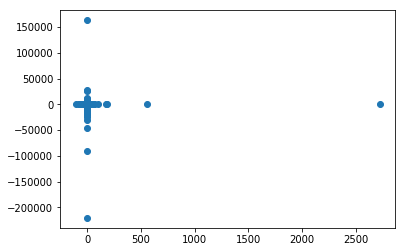

In [58]:
plt.scatter(forgive_me_df['S&P index'], forgive_me_df['Return on Equity % [Buyers/Investors]'])

In [59]:
a = forgive_me_df['Return on Equity % [Buyers/Investors]'][(forgive_me_df['Return on Equity % [Buyers/Investors]'] < 1500) &\
                                                          (forgive_me_df['Return on Equity % [Buyers/Investors]'] >-150)]
b = forgive_me_df['Kras Index'][(forgive_me_df['Return on Equity % [Buyers/Investors]'] < 1500) &\
                                                          (forgive_me_df['Return on Equity % [Buyers/Investors]'] >-150)]
с = forgive_me_df['S&P index'][(forgive_me_df['Return on Assets % [Buyers/Investors]'] < 1500) &\
                               (forgive_me_df['Return on Assets % [Buyers/Investors]'] >-150)]
d = forgive_me_df['Return on Assets % [Buyers/Investors]'][(forgive_me_df['Return on Assets % [Buyers/Investors]'] < 1500) &\
                                                          (forgive_me_df['Return on Assets % [Buyers/Investors]'] >-150)]

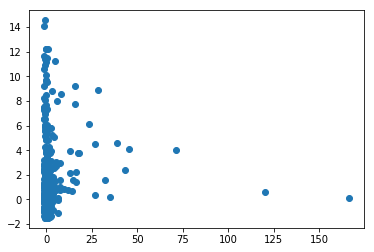

In [60]:
plt.scatter(b, a/100)

# War with outliers

(array([  4.,   2.,   3.,   1.,   3.,   4.,   2.,   3.,   3.,   4.,   0.,
          3.,   2.,   4.,   4.,   2.,   5.,   4.,   7.,   3.,   2.,   2.,
          3.,   2.,   9.,   1.,   4.,   3.,   8.,   4.,   1.,   3.,   8.,
          8.,  11.,   6.,  16.,  10.,  12.,  11.,   9.,  13.,  11.,  18.,
         13.,  14.,  15.,  14.,  18.,  22.,  25.,  20.,  27.,  57.,  47.,
         55.,  72., 104., 140., 311., 721., 645., 395., 131.,  51.,  29.,
          7.,   5.,   2.,   5.,   2.,   1.,   0.,   3.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([-196.9  , -193.587, -190.274, -186.961, -183.648, -180.335,
        -177.022, -173.709, -170.396, -167.083, -163.77 , -160.457,
        -157.144, -153.831, -150.518, -147.205, -143.892, -140.579,
        -137.266, -133.953, -130.64 , -127.327, -124.014, -120.701,
        -117.388, -114.075, -110.762, -107.449

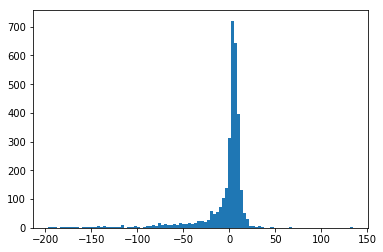

In [61]:
plt.hist(forgive_me_df['Return on Assets % [Buyers/Investors]'][(forgive_me_df['Return on Assets % [Buyers/Investors]'] > -200) &\
                                                               (forgive_me_df['Return on Assets % [Buyers/Investors]'] < 200)], bins = 100)

In [62]:
forgive_me_df = forgive_me_df[(forgive_me_df['Return on Assets % [Buyers/Investors]'] > -200) &\
                                                               (forgive_me_df['Return on Assets % [Buyers/Investors]'] < 200)]

(array([  4.,   3.,   3.,   3.,   1.,   4.,   7.,   3.,   4.,   6.,   3.,
          6.,   5.,   3.,   7.,   3.,   5.,   0.,   6.,   6.,   5.,   7.,
          3.,   7.,  10.,   9.,  10.,   5.,   7.,  14.,  12.,  10.,   8.,
         12.,  15.,  15.,   8.,  18.,  19.,  20.,  30.,  30.,  33.,  44.,
         47.,  41.,  55.,  60.,  69., 105., 159., 258., 318., 358., 310.,
        220., 128.,  75.,  51.,  28.,  22.,  27.,  21.,  16.,   6.,  13.,
          9.,  11.,  11.,   6.,   5.,   7.,   5.,   2.,   3.,   6.,  10.,
          2.,   1.,   1.,   7.,   4.,   2.,   5.,   2.,   4.,   2.,   3.,
          4.,   0.,   3.,   5.,   0.,   2.,   1.,   1.,   3.,   4.,   3.,
          1.]),
 array([-198.   , -194.076, -190.152, -186.228, -182.304, -178.38 ,
        -174.456, -170.532, -166.608, -162.684, -158.76 , -154.836,
        -150.912, -146.988, -143.064, -139.14 , -135.216, -131.292,
        -127.368, -123.444, -119.52 , -115.596, -111.672, -107.748,
        -103.824,  -99.9  ,  -95.976,  -92.052

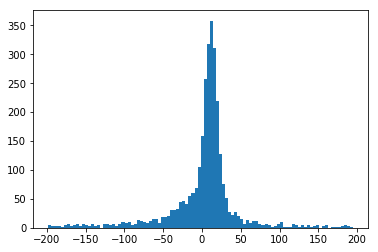

In [63]:
plt.hist(forgive_me_df['Return on Equity % [Buyers/Investors]'][(forgive_me_df['Return on Equity % [Buyers/Investors]'] > -200) &\
                                                               (forgive_me_df['Return on Equity % [Buyers/Investors]'] < 200)], bins = 100)

In [64]:
forgive_me_df = forgive_me_df[(forgive_me_df['Return on Equity % [Buyers/Investors]'] > -200) &\
                                                               (forgive_me_df['Return on Equity % [Buyers/Investors]'] < 200)]

In [65]:
forgive_me_df = forgive_me_df[forgive_me_df['R&D intensity'] < 1]

(array([1.079e+03, 3.300e+01, 7.700e+01, 9.100e+01, 8.700e+01, 1.060e+02,
        9.100e+01, 7.500e+01, 7.100e+01, 7.500e+01, 5.800e+01, 7.400e+01,
        7.200e+01, 8.100e+01, 7.600e+01, 7.200e+01, 6.100e+01, 6.900e+01,
        4.500e+01, 6.200e+01, 4.300e+01, 4.300e+01, 4.100e+01, 2.000e+01,
        3.000e+01, 2.200e+01, 1.500e+01, 1.800e+01, 8.000e+00, 1.200e+01,
        4.000e+00, 1.400e+01, 8.000e+00, 6.000e+00, 7.000e+00, 6.000e+00,
        7.000e+00, 3.000e+00, 5.000e+00, 7.000e+00, 3.000e+00, 6.000e+00,
        4.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 3.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

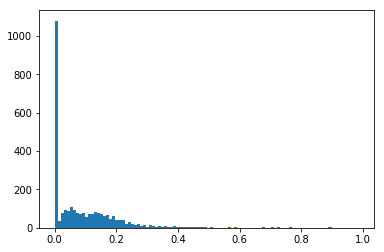

In [66]:
plt.hist(forgive_me_df['R&D intensity'], bins = 100)

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 8.000e+00, 7.000e+00,
        1.000e+01, 2.400e+01, 3.700e+01, 2.449e+03, 2.280e+02, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

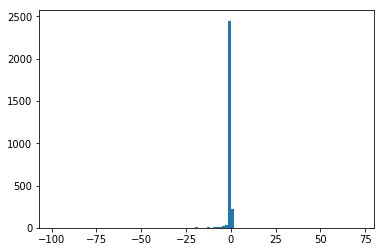

In [67]:
plt.hist(forgive_me_df['average margin by Kras'][(forgive_me_df['average margin by Kras'] > -100) &\
                                                (forgive_me_df['average margin by Kras'] < 100)].dropna(), bins = 100)

In [68]:
forgive_me_df = forgive_me_df[(forgive_me_df['average margin by Kras'] > -100) &\
                                                (forgive_me_df['average margin by Kras'] < 100)]

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 5.000e+00, 3.000e+00,
        6.000e+00, 6.000e+00, 6.000e+00, 7.000e+00, 2.200e+01, 5.900e+01,
        1.065e+03, 1.422e+03, 1.080e+02, 3.000e+01, 1.100e+01, 9.000e+00,
        6.000e+00, 5.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

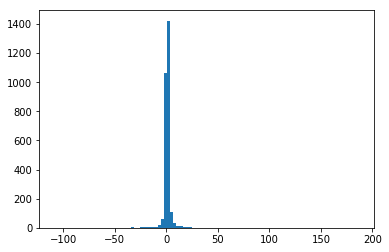

In [69]:
plt.hist(forgive_me_df['S&P index'][forgive_me_df['S&P index'] < 500], bins = 100)

In [70]:
forgive_me_df = forgive_me_df[forgive_me_df['S&P index'] < 500]

In [71]:
len(np.unique(forgive_me_df.index))

937

In [72]:
forgive_me_df.corr()

,"Total Transaction Value ($USDmm, Historical rate)","EBITDA ($USDmm, Historical rate) [Buyers/Investors]","EBIT ($USDmm, Historical rate) [Buyers/Investors]",Net Income Margin % [Buyers/Investors],"Total Common Equity ($USDmm, Historical rate) [Buyers/Investors]","Total Debt ($USDmm, Historical rate) [Buyers/Investors]","Total Cash & ST Investments ($USDmm, Historical rate) [Buyers/Investors]","Total Assets ($USDmm, Historical rate) [Buyers/Investors]","Net Debt ($USDmm, Historical rate) [Buyers/Investors]",Return on Assets % [Buyers/Investors],...,Telecommunications industry target,Overall growth,Q,EVA,COST OF CAPITAL,Firm Age,R&D intensity,Economic Profit,S&P index,Numbers
"Total Transaction Value ($USDmm, Historical rate)",1.000000,0.285093,0.236838,0.005019,0.248258,0.398319,0.235294,0.363773,0.210628,0.043775,...,-0.011363,0.013597,-0.027347,0.061160,-0.031656,0.062561,-0.020350,0.072552,-0.000724,0.011211
"EBITDA ($USDmm, Historical rate) [Buyers/Investors]",0.285093,1.000000,0.979110,0.020203,0.856273,0.409859,0.411216,0.565568,0.181076,0.121285,...,-0.016615,-0.009715,-0.021187,0.674947,0.003122,0.118842,-0.030070,0.104643,0.006690,-0.018126
"EBIT ($USDmm, Historical rate) [Buyers/Investors]",0.236838,0.979110,1.000000,0.021563,0.826529,0.353389,0.421988,0.520194,0.059889,0.127854,...,-0.014873,-0.008779,-0.014581,0.730348,0.003154,0.114376,-0.024006,0.110578,0.007507,-0.039168
Net Income Margin % [Buyers/Investors],0.005019,0.020203,0.021563,1.000000,0.020526,0.005107,0.010089,0.009909,-0.004954,0.101934,...,-0.000802,-0.001297,-0.100980,0.101335,0.076883,0.126743,-0.051096,0.255057,0.006515,-0.025091
"Total Common Equity ($USDmm, Historical rate) [Buyers/Investors]",0.248258,0.856273,0.826529,0.020526,1.000000,0.573764,0.668614,0.745799,0.120378,0.111026,...,-0.012771,-0.010955,-0.027108,0.386254,0.005909,0.114816,0.002962,0.068098,0.005998,-0.022498
"Total Debt ($USDmm, Historical rate) [Buyers/Investors]",0.398319,0.409859,0.353389,0.005107,0.573764,1.000000,0.852457,0.962898,0.653988,0.041548,...,-0.010011,-0.007456,-0.028038,-0.024470,0.005772,0.055217,-0.049875,0.029815,-0.010104,-0.013839
"Total Cash & ST Investments ($USDmm, Historical rate) [Buyers/Investors]",0.235294,0.411216,0.421988,0.010089,0.668614,0.852457,1.000000,0.891084,0.164825,0.058302,...,-0.006335,-0.006119,-0.010781,0.028615,0.007075,0.036290,0.016045,0.030493,-0.003572,-0.045363
"Total Assets ($USDmm, Historical rate) [Buyers/Investors]",0.363773,0.565568,0.520194,0.009909,0.745799,0.962898,0.891084,1.000000,0.529563,0.065216,...,-0.011185,-0.008496,-0.029369,0.094031,0.006579,0.089070,-0.041856,0.047737,-0.006343,-0.023743
"Net Debt ($USDmm, Historical rate) [Buyers/Investors]",0.210628,0.181076,0.059889,-0.004954,0.120378,0.653988,0.164825,0.529563,1.000000,-0.004552,...,-0.010384,-0.005497,-0.039431,-0.086770,0.000672,0.056007,-0.122372,0.012975,-0.014152,0.033900
Return on Assets % [Buyers/Investors],0.043775,0.121285,0.127854,0.101934,0.111026,0.041548,0.058302,0.065216,-0.004552,1.000000,...,-0.034426,-0.172539,-0.435945,0.101255,0.046343,0.114556,-0.118562,0.185373,0.035005,-0.018871


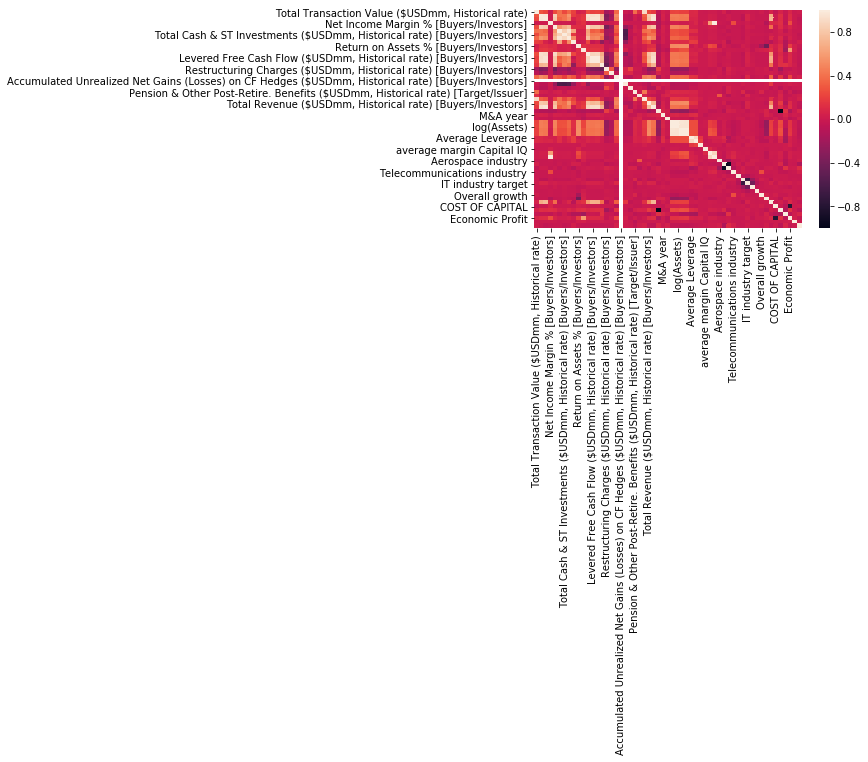

In [73]:
import seaborn as sns
sns.heatmap(forgive_me_df.corr())

# Import

In [74]:
writer = pd.ExcelWriter('stata_2.xlsx')
forgive_me_df.to_excel(writer,'for stata')
writer.save()

In [75]:
forgive_me_df['Other industry target'].unique()

array([0.        , 1.        , 0.5       , 0.66666667, 0.25      ,
       0.33333333, 0.4       , 0.06666667, 0.16666667, 0.2       ,
       0.14285714, 0.36363636, 0.11111111, 0.28571429, 0.75      ,
       0.15      , 0.42857143, 0.6       , 0.1       , 0.375     ,
       0.125     , 0.22222222, 0.44444444, 0.17391304, 0.05263158,
       0.08333333, 0.3       ])

# END

In [76]:
forgive_me_df.columns

Index(['Total Transaction Value ($USDmm, Historical rate)',
       'EBITDA ($USDmm, Historical rate) [Buyers/Investors]',
       'EBIT ($USDmm, Historical rate) [Buyers/Investors]',
       'Net Income Margin % [Buyers/Investors]',
       'Total Common Equity ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Debt ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Cash & ST Investments ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Assets ($USDmm, Historical rate) [Buyers/Investors]',
       'Net Debt ($USDmm, Historical rate) [Buyers/Investors]',
       'Return on Assets % [Buyers/Investors]',
       'Return on Equity % [Buyers/Investors]',
       'Cash from Ops. ($USDmm, Historical rate) [Buyers/Investors]',
       'Levered Free Cash Flow ($USDmm, Historical rate) [Buyers/Investors]',
       'Unlevered Free Cash Flow ($USDmm, Historical rate) [Buyers/Investors]',
       'R&D Exp. ($USDmm, Historical rate) [Buyers/Investors]',
       'Restructuring Cha

In [77]:
'Aerospace industry', 'Healthcare industry', 'IT industry', 'Telecommunications industry'

('Aerospace industry',
 'Healthcare industry',
 'IT industry',
 'Telecommunications industry')

In [78]:
precheck = forgive_me_df.reset_index()

In [79]:
precheck = precheck.groupby('Security Tickers [Buyers/Investors] without date').mean()

In [80]:
precheck['IT industry'] = precheck['IT industry'].round(0)
precheck['Healthcare industry'] = precheck['Healthcare industry'].round(0)
precheck['Aerospace industry'] = precheck['Aerospace industry'].round(0)
precheck['Telecommunications industry'] = precheck['Telecommunications industry'].round(0)
precheck['Other industry target'] = precheck['Other industry target'].round(0)

In [81]:
precheck['IT industry'].unique()

array([0., 1.])

In [82]:
check_df = pd.DataFrame()

In [83]:
check_df['first_columns'] = precheck['tau'].reset_index(drop = True)

In [84]:
check_df['Industry'] = 0
check_df['Industry_target'] = 'high-tech'

In [85]:
check_df['first_column'] = precheck['tau'].reset_index(drop = True)

In [86]:
check_df['Industry'][precheck['Aerospace industry'].reset_index(drop = True) == 1] = 'Aerospace'
check_df['Industry'][precheck['Healthcare industry'].reset_index(drop = True) == 1] = 'Healthcare'
check_df['Industry'][precheck['IT industry'].reset_index(drop = True) == 1] = 'IT'
check_df['Industry'][precheck['Telecommunications industry'].reset_index(drop = True) == 1] = 'Telecommunications'
check_df['Industry_target'][precheck['Other industry target'].reset_index(drop = True) == 1] = 'non high-tech'

/Users/andreykras/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/andreykras/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/andreykras/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid 

In [87]:
change_list = []
for i in range(len(check_df)):
    if check_df['Industry'][i] == 0:
        change_list.append(i)

In [88]:
check_df['Industry'][change_list]

0      0
2      0
3      0
5      0
6      0
8      0
63     0
112    0
117    0
133    0
185    0
300    0
307    0
332    0
347    0
385    0
416    0
418    0
443    0
501    0
549    0
557    0
562    0
567    0
602    0
707    0
749    0
824    0
831    0
836    0
872    0
886    0
916    0
Name: Industry, dtype: object

In [89]:
check_df.loc[change_list[:22],'Industry'] = 'Aerospace'
check_df.loc[change_list[22:],'Industry'] = 'Telecommunications'

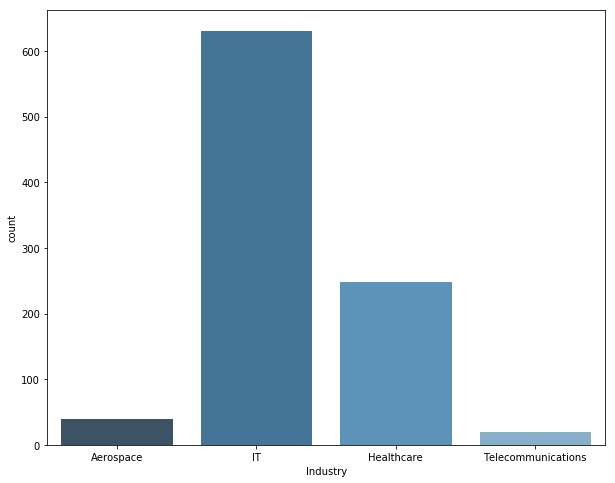

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x='Industry', data=check_df, palette="Blues_d")

In [91]:
ch_df = pd.get_dummies(check_df.Industry)
ch_df['Industry'] = check_df.Industry

In [92]:
ch_df = ch_df.groupby('Industry').sum()

In [93]:
ch_df['count'] = ch_df.Aerospace + ch_df.Healthcare + ch_df.IT + ch_df.Telecommunications

In [94]:
ch_df = ch_df.reindex(index = ['Telecommunications','Aerospace','Healthcare', 'IT'])
ch_df

,Aerospace,Healthcare,IT,Telecommunications,count
Industry,,,,,
Telecommunications,0.0,0.0,0.0,19.0,19.0
Aerospace,39.0,0.0,0.0,0.0,39.0
Healthcare,0.0,248.0,0.0,0.0,248.0
IT,0.0,0.0,631.0,0.0,631.0


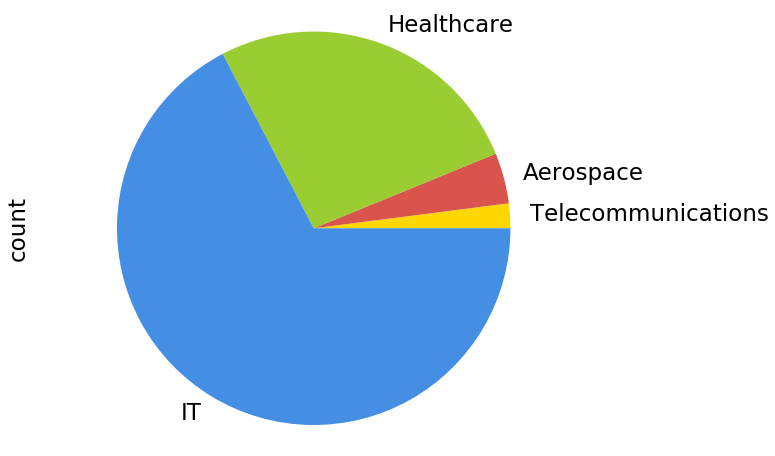

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
colors = ['gold', '#d9544d', 'yellowgreen', '#448ee4']
ch_df['count'].plot(kind='pie', colors = colors)
plt.axis('equal')
plt.rcParams.update({'font.size': 23})
plt.show()

In [116]:
ch_df = pd.get_dummies(check_df.Industry_target)
ch_df['Industry (target)'] = check_df.Industry_target

In [117]:
ch_df = ch_df.groupby('Industry (target)').sum()
ch_df['count'] = ch_df['high-tech'] + ch_df['non high-tech']
ch_df = ch_df.reindex(index = ['non high-tech','high-tech'])
ch_df

,high-tech,non high-tech,count
Industry (target),,,
non high-tech,0.0,56.0,56.0
high-tech,881.0,0.0,881.0


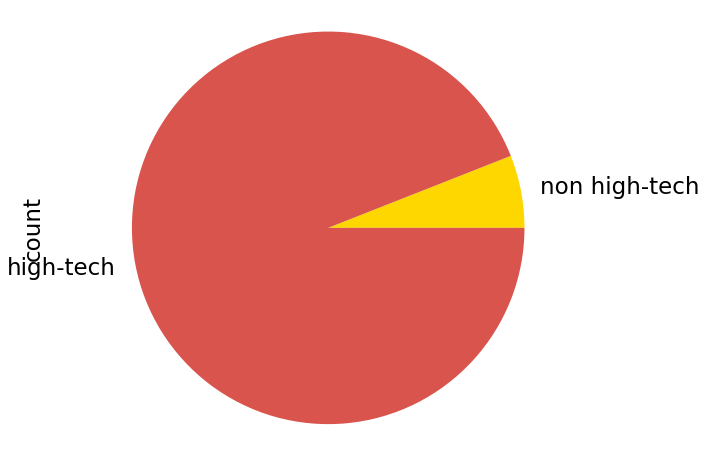

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ch_df['count'].plot(kind='pie', colors = colors)
plt.axis('equal')
plt.show()

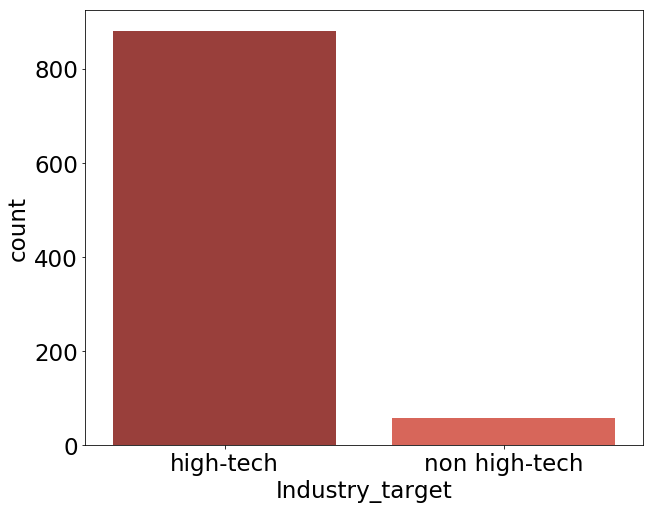

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x='Industry_target', data=check_df, palette="Reds_d")

In [121]:
check_df['Industry_target'].value_counts()

high-tech        881
non high-tech     56
Name: Industry_target, dtype: int64

In [122]:
check_df2 = pd.DataFrame()

In [123]:
check_df2['Other_target'] = forgive_me_df['Other industry target'].reset_index(drop = True)
check_df2['Industry_target'] = 'high-tech'

In [124]:
check_df2['Industry_target'][check_df2['Other_target'] > 0] = 'non high-tech'

/Users/andreykras/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
ch_df = pd.get_dummies(check_df2.Industry_target)
ch_df['Industry (target)'] = check_df2.Industry_target

In [126]:
ch_df = ch_df.groupby('Industry (target)').sum()
ch_df['count'] = ch_df['high-tech'] + ch_df['non high-tech']
ch_df = ch_df.reindex(index = ['non high-tech','high-tech'])
ch_df

,high-tech,non high-tech,count
Industry (target),,,
non high-tech,0.0,532.0,532.0
high-tech,2264.0,0.0,2264.0


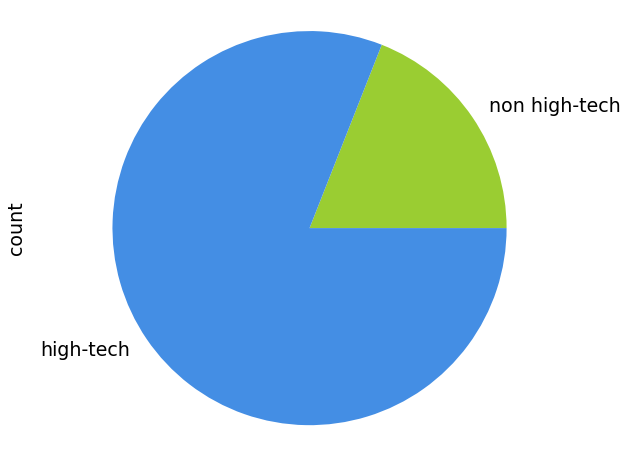

In [140]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
colors = ['yellowgreen', '#448ee4']
ch_df['count'].plot(kind='pie', colors = colors)
plt.rcParams.update({'font.size': 19})
plt.axis('equal')
plt.show()

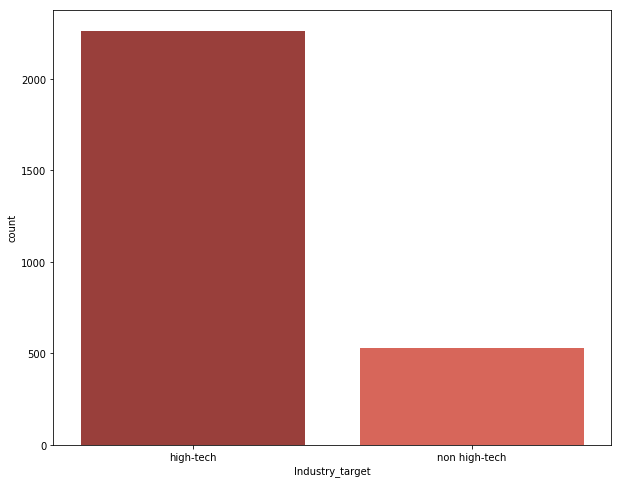

In [134]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x='Industry_target', data=check_df2, palette="Reds_d")

In [135]:
check_df2['Industry_target'].value_counts()

high-tech        2264
non high-tech     532
Name: Industry_target, dtype: int64

In [136]:
forgive_me_df['Other industry target'].unique()

array([0.        , 1.        , 0.5       , 0.66666667, 0.25      ,
       0.33333333, 0.4       , 0.06666667, 0.16666667, 0.2       ,
       0.14285714, 0.36363636, 0.11111111, 0.28571429, 0.75      ,
       0.15      , 0.42857143, 0.6       , 0.1       , 0.375     ,
       0.125     , 0.22222222, 0.44444444, 0.17391304, 0.05263158,
       0.08333333, 0.3       ])

In [137]:
check_df2['MAyear'] = forgive_me_df['M&A year'].reset_index(drop = True)

In [138]:
check_df2.loc[np.arange(32),'MAyear'] = 2009
check_df2.loc[np.arange(32,60),'MAyear'] = 2010
check_df2.loc[np.arange(60,88),'MAyear'] = 2011
check_df2.loc[np.arange(88,116),'MAyear'] = 2012
check_df2.loc[np.arange(116,144),'MAyear'] = 2013
check_df2.loc[np.arange(144,172),'MAyear'] = 2014
check_df2.loc[np.arange(172,200),'MAyear'] = 2015
check_df2.loc[np.arange(200,228),'MAyear'] = 2016
check_df2.loc[np.arange(228,256),'MAyear'] = 2017

In [139]:
check_df2['M&A year'] = check_df2['MAyear'].astype(int)

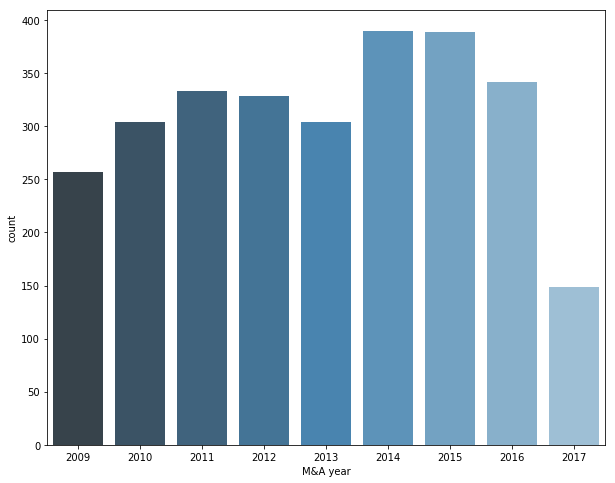

In [141]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x='M&A year', data=check_df2, palette="Blues_d")

In [261]:
change_list2 = list(check_df2[check_df2['MAyear'] == 2008].index)

In [262]:
len(change_list2)

256

In [271]:
np.arange(60, 80)

array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79])

In [279]:
len(forgive_me_df)

2796

In [ ]:
corr_df = pd.read_excel('for_correlation.xlsx', index_col = 0)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.heatmap(corr_df.corr())

In [ ]:
corr_df.corr()

In [ ]:
writer = pd.ExcelWriter('corr_matrix.xlsx')
corr_df.corr().to_excel(writer,'for diploma')
writer.save()

In [ ]:
np.unique(forgive_me_df.index)

In [ ]:
for_bloomberg = pd.read_excel('for_q_and_eva1.xlsx')

In [ ]:
for_bloomberg.head()

In [ ]:
for_bloomberg['for_bloomberg'] = for_bloomberg['Unnamed: 2'] + ' ' +\
for_bloomberg['smth to add']

In [ ]:
for_bloomberg

In [ ]:
writer = pd.ExcelWriter('for_bloomberg.xlsx')
for_bloomberg.to_excel(writer,'for_bloomberg')
writer.save()

### Что остается сделать
- преобразовать датафрейм
- посчитать второй индекс
- посчитать контрольки 

In [488]:
check_df_companies = forgive_me_df.index
check_df = forgive_me_df[['Healthcare industry', 'IT industry', 'Aerospace industry', 'Telecommunications industry']].reset_index()

In [492]:
check_df = check_df.groupby('Security Tickers [Buyers/Investors] without date').mean()

In [493]:
check_df[['Healthcare industry', 'IT industry', 'Aerospace industry', 'Telecommunications industry']].sum()

Healthcare industry            248.911111
IT industry                    629.707143
Aerospace industry              17.000000
Telecommunications industry      8.000000
dtype: float64

In [349]:
columns_2008 = []
for i in hope_df.columns:
    if '2008' in i:
        columns_2008.append(i)
columns_2008

['EBITDA [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]',
 'EBIT [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]',
 'Net Income Margin % [FY 2008] [Buyers/Investors]',
 'Total Common Equity [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]',
 'Total Debt [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]',
 'Total Cash & ST Investments [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]',
 'Total Assets [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]',
 'Net Debt [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]',
 'Return on Assets % [FY 2008] [Buyers/Investors]',
 'Return on Equity % [FY 2008] [Buyers/Investors]',
 'Cash from Ops. [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]',
 'Levered Free Cash Flow [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]',
 'Unlevered Free Cash Flow [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]',
 'R&D Exp. [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]',
 'Restructuring Charges [FY 2

In [352]:
import math

Average company size (assets)

In [374]:
for i in range(2008, 2018):
    assets_0 = hope_df['Total Assets [FY ' + str(i-2) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    assets_1 = hope_df['Total Assets [FY ' + str(i-1) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    assets_2 = hope_df['Total Assets [FY ' + str(i) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    assets_i = (assets_0 + assets_1 + assets_2)/3
    hope_df['Company Size ' + str(i)] = assets_i.apply(np.log)

Average Leverage

In [375]:
for i in range(2008, 2018):
    equity_0 = hope_df['Total Common Equity [FY ' + str(i-2) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    equity_1 = hope_df['Total Common Equity [FY ' + str(i-1) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    equity_2 = hope_df['Total Common Equity [FY ' + str(i) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    debt_0 = hope_df['Total Debt [FY ' + str(i-2) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    debt_1 = hope_df['Total Debt [FY ' + str(i-1) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    debt_2 = hope_df['Total Debt [FY ' + str(i) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    DE_0 = debt_0/equity_0
    DE_1 = debt_1/equity_1
    DE_2 = debt_2/equity_2
    DE_i = (DE_0 + DE_1 + DE_2)/3
    hope_df['Average Leverage  ' + str(i)] = DE_i.apply(np.log)

Average Margin

In [376]:
for i in range(2008, 2018):
    margin_0 = hope_df['Net Income Margin % [FY ' + str(i-2) + '] [Buyers/Investors]'].fillna(0)
    margin_1 = hope_df['Net Income Margin % [FY ' + str(i-1) + '] [Buyers/Investors]'].fillna(0)/100
    margin_2 = hope_df['Net Income Margin % [FY ' + str(i) + '] [Buyers/Investors]'].fillna(0)/100
    margin_i = (margin_0 + margin_1 + margin_2)/3
    hope_df['average margin ' + str(i)] = margin_i.apply(np.log)

In [377]:
hope_df

,"Market Capitalization [My Setting] [Latest] ($USDmm, Historical rate) [Buyers/Investors]","Market Capitalization [My Setting] [Latest] ($USDmm, Historical rate) [Target/Issuer]","Total Transaction Value ($USDmm, Historical rate)","EBITDA [FY 2006] ($USDmm, Historical rate) [Buyers/Investors]","EBITDA [FY 2007] ($USDmm, Historical rate) [Buyers/Investors]","EBITDA [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]","EBITDA [FY 2009] ($USDmm, Historical rate) [Buyers/Investors]","EBITDA [FY 2010] ($USDmm, Historical rate) [Buyers/Investors]","EBITDA [FY 2011] ($USDmm, Historical rate) [Buyers/Investors]","EBITDA [FY 2012] ($USDmm, Historical rate) [Buyers/Investors]",...,average margin 2008,average margin 2009,average margin 2010,average margin 2011,average margin 2012,average margin 2013,average margin 2014,average margin 2015,average margin 2016,average margin 2017
1060SEHK,576830.500,NaN,404.920000,531.900,1037.200,1254.639,1479.919,2614.618,3009.890000,3475.200000,...,-0.789438,-0.703871,-0.710836,-0.909150,-0.878513,-0.615878,-0.469151,0.137150,-0.450986,-0.694481
1337,4362.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-inf,-inf,-inf,-inf,-inf,-inf,-3.839702,-8.229511,NaN,NaN
3V3,14.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.149000,...,-inf,-inf,-inf,-inf,NaN,NaN,NaN,NaN,NaN,NaN
4508NYSE,183691.300,NaN,245.320000,9006.700,10115.200,12025.800,11908.300,13088.500,15640.700000,15956.000000,...,-1.001576,-1.065468,-1.102118,-1.071970,-1.016295,-0.986266,-0.991823,-1.013261,-0.997682,-1.190508
4755,12111.800,NaN,NaN,274.200,284.200,698.900,822.200,1079.900,1249.300000,1172.000000,...,NaN,-3.123566,-3.895494,-2.378746,-3.051950,-3.190126,-2.507152,-2.434214,-2.573082,-3.297739
526853,27.900,NaN,NaN,839.500,890.500,777.600,821.800,826.500,1037.200000,847.100000,...,-1.811146,-1.859610,-1.985102,-2.056767,-2.232748,-2.132842,-2.472188,-3.435789,NaN,NaN
5BI,NaN,NaN,NaN,NaN,NaN,-0.232,0.256,0.203,NaN,0.364000,...,-5.496768,-4.275866,-4.151338,-4.453022,-4.221496,NaN,NaN,NaN,NaN,NaN
700,552188.400,52987.4,2338.770000,154.300,242.900,513.000,932.000,1574.100,2100.100000,2785.700000,...,-0.933946,-0.905516,-0.905516,-0.931404,-1.042232,-1.198433,-1.262308,-1.274157,-1.258781,-1.696449
8424TSE,62754.100,NaN,NaN,18114.600,12160.600,9303.200,7712.700,9257.000,13779.690000,12872.100000,...,-0.902388,-1.543213,NaN,NaN,NaN,1.793370,NaN,NaN,NaN,NaN
9984SEHK,644932.500,NaN,8000.000000,1369.100,4615.500,6566.200,7564.400,9822.000,13163.700000,15086.600000,...,-0.850737,-0.852065,-0.833713,-0.839098,-0.872194,-0.931320,-0.966707,-0.994162,-1.041382,-1.274276
